# Model of DC motor with inductance

See http://ctms.engin.umich.edu/CTMS/index.php?example=MotorSpeed&section=SimulinkModeling


In [2]:
import numpy as np
import sympy as sy
import control.matlab as cm
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# Set parameters of the model
I = 0.01 # kg m^2
m = 0.01 # V/rad/s
k = 0.01 # Nm/Amp
R = 1.0 # Ohm
L = 0.5 # H
a1 = k/I
a2 = m/L
a3 = R/L
b = 1.0/L

In [50]:
s,t = sy.symbols('s,t')

In [51]:
A = sy.Matrix([[0,1,0],[0,0,a1], [0,-a2,-a3]])

In [52]:
sIA = s*sy.eye(3) - A
sIA

Matrix([
[s,   -1,       0],
[0,    s,    -1.0],
[0, 0.02, s + 2.0]])

In [78]:
sIA.inv()

Matrix([
[1/s, s**(-2) - 0.02/(s**3*(s + 2.0 + 0.02/s)), 1.0/(s**2*(s + 2.0 + 0.02/s))],
[  0,     1/s - 0.02/(s**2*(s + 2.0 + 0.02/s)),    1.0/(s*(s + 2.0 + 0.02/s))],
[  0,             -0.02/(s*(s + 2.0 + 0.02/s)),          1/(s + 2.0 + 0.02/s)]])

In [79]:
B = sy.Matrix([[0],[0],[b]])
C = sy.Matrix([[1,0,0]])

In [80]:
sIAinv = sIA.inv()
G = C*sIAinv*B
print G


Matrix([[2.0/(s**2*(s + 2.0 + 0.02/s))]])


In [93]:
# Hard code G because of problems with sy.factor()
G = 2/(s*(s+1.99)*(s+0.01))
print G

2/(s*(s + 0.01)*(s + 1.99))



          2
--------------------
s^3 + 2 s^2 + 0.02 s



(-10, 1)

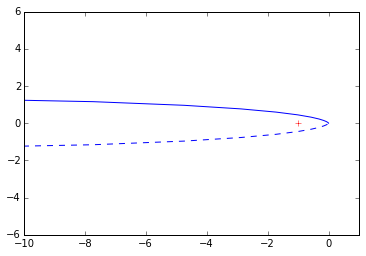

In [105]:
Gs = cm.tf([2],[1, 2, 0.02, 0])
print Gs
h = 0.01
Gd = cm.c2d(Gs, h)

cm.nyquist(Gs)
plt.ylim(-6,6)
plt.xlim(-10,1)

In [95]:
# Try to sample symbolically 

#Y = sy.apart(G/s)
#print Y
#y = sy.inverse_laplace_transform(Y,s,t)
#print y


-0.00255069571500975/(0.01*s + 0.0199) + 101.010101010101/(0.01*s + 0.0001) - 10100.7550314386/s + 100.502512562814/s**2
10000.0*((50.251256281407*t + 50.251256281407*polygamma(0, 0.01) - 50.251256281407*polygamma(0, 2.99) + 50.251256281407*polygamma(0, 1.99) - 50.251256281407*polygamma(0, 1.01))*exp(2.0*t) - 0.127534785750487*exp(0.01*t) + 5050.50505050504*exp(1.99*t))*exp(-2.0*t)*Heaviside(t)


In [90]:
den = (s+1.99)*(s+0.01)*s
print den
den2=sy.expand(den)
print den2
print sy.simplify(den-den2)
den3 = sy.factor(den2)
print den3
print sy.simplify(den-den3)

s*(s + 0.01)*(s + 1.99)
s**3 + 2.0*s**2 + 0.0199*s
0
1.0*s*(0.01*s + 0.0001)*(0.01*s + 0.0199)
s*(0.9999*s**2 + 1.9998*s + 0.01989801)


In [66]:
y = sy.inverse_laplace_transform(Y,s,t)
print y

2.0*((50.0000000000002*t + 50.0000000000002*polygamma(0, 0.0100505063388334) - 50.0000000000002*polygamma(0, 2.98994949366117) + 50.0000000000002*polygamma(0, 1.98994949366117) - 50.0000000000002*polygamma(0, 1.01005050633883))*exp(2.0*t) - 0.127547766721604*exp(0.0100505063388334*t) + 5000.12754776677*exp(1.98994949366117*t))*exp(-2.0*t)*Heaviside(t)


In [56]:
sIA.det()

s**3 + 2.0*s**2 + 0.02*s

In [57]:
sIA.adjugate()

Matrix([
[-s*(-s - 2.0) + 0.02,       s + 2.0,   1.0],
[                   0, -s*(-s - 2.0), 1.0*s],
[                   0,       -0.02*s,  s**2]])

In [58]:
Id=sIA*sIA.adjugate()/sIA.det()

In [59]:
for r in Id.tolist():
    for c in r:
        print sy.simplify(c)

1.00000000000000
0
0
0
1.00000000000000
0
0
0
1.00000000000000


In [82]:
np.sqrt(0.96)

0.9797958971132712

In [68]:
0.99*0.99

0.9801

In [69]:
sy.expand((s+1.99)*(s+0.01))

s**2 + 2.0*s + 0.0199

In [3]:
# Simpler model
H2 = cm.tf([0.19, 0.15], [1, -1.5, 0.5], np.log(2))
H2


  0.19 z + 0.15
-----------------
z^2 - 1.5 z + 0.5

dt = 0.69314718056

In [5]:
H2(np.exp(1j*0.001))

(-1.3199970599189332-679.99798333757929j)

In [6]:
-1.32*0.25

-0.33

In [7]:
0.34-0.19*0.5

0.24500000000000002

In [21]:
w=0.001
cw = np.cos(w)
#sw = np.sin(w)
#cw = 1.0
sw = w
H21w = (0.19*(cw + 1j*sw) + 0.15) / ( (cw+1j*sw-1) * (cw+1j*sw - 0.5) ) 
print H21w
H22w = (0.19+0.15 + 1j*0.19*w)/( (-w**2/2.0 + 1j*w)*(0.5+1j*w))
H23w = (0.19+0.15 + 1j*0.19*w)/(1j*w*(0.5+1j*w))
print H22w
print ( (w+1j*0.5)*(0.34 + 1j*0.19*w) )/(-w*(w**2 + 0.25))

(-1.31999694667-679.997870004j)
(-1.31999477002-679.99738001j)
(-0.979996080016-679.998040008j)


In [22]:
10**(0.25)

1.7782794100389228